In [219]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import random
from scipy import signal

In [220]:
import tensorflow as tf

In [221]:
# 1. Keeping only usable and useful features from the raw data

# Returns the list of used columns (dropping lower joints, useless features...)
def computeUsedColumns() :
    # Header computed on one frame row (skipping rows 2-6) with following replace regex:
    #
    # ([A-z]+)\s*\w+\s+[\-0-9\.]+\s+[\-0-9\.]+\s+[\-0-9\.]+\s+[\-0-9\.]+\s+[\-0-9\.]+\s+[\-0-9\.]+\s+[\-0-9\.]+\s+
    # $1\t$1Status\t$1LocX\t$1LocY\t$1LocZ\t$1OrW\t$1OrX\t$1OrY\t$1OrZ\t
    
    header = ["Index", "Time", "SkeletonId", "HandLeftConfidence", "HandLeftState", "HandRightConfidence", "HandRightState", 
              "SpineBase", "SpineBaseStatus", "SpineBaseLocX", "SpineBaseLocY", "SpineBaseLocZ", "SpineBaseOrW", 
              "SpineBaseOrX", "SpineBaseOrY", "SpineBaseOrZ", "SpineMid", "SpineMidStatus", "SpineMidLocX", "SpineMidLocY", 
              "SpineMidLocZ", "SpineMidOrW", "SpineMidOrX", "SpineMidOrY", "SpineMidOrZ", "Neck", "NeckStatus", "NeckLocX", 
              "NeckLocY", "NeckLocZ", "NeckOrW", "NeckOrX", "NeckOrY", "NeckOrZ", "Head", "HeadStatus", "HeadLocX", "HeadLocY",
              "HeadLocZ", "HeadOrW", "HeadOrX", "HeadOrY", "HeadOrZ", "ShoulderLeft", "ShoulderLeftStatus", "ShoulderLeftLocX",
              "ShoulderLeftLocY", "ShoulderLeftLocZ", "ShoulderLeftOrW", "ShoulderLeftOrX", "ShoulderLeftOrY", 
              "ShoulderLeftOrZ", "ElbowLeft", "ElbowLeftStatus", "ElbowLeftLocX", "ElbowLeftLocY", "ElbowLeftLocZ", 
              "ElbowLeftOrW", "ElbowLeftOrX", "ElbowLeftOrY", "ElbowLeftOrZ", "WristLeft", "WristLeftStatus", "WristLeftLocX",
              "WristLeftLocY", "WristLeftLocZ", "WristLeftOrW", "WristLeftOrX", "WristLeftOrY", "WristLeftOrZ", "HandLeft", 
              "HandLeftStatus", "HandLeftLocX", "HandLeftLocY", "HandLeftLocZ", "HandLeftOrW", "HandLeftOrX", "HandLeftOrY", 
              "HandLeftOrZ", "ShoulderRight", "ShoulderRightStatus", "ShoulderRightLocX", "ShoulderRightLocY",
              "ShoulderRightLocZ", "ShoulderRightOrW", "ShoulderRightOrX", "ShoulderRightOrY", "ShoulderRightOrZ",
              "ElbowRight", "ElbowRightStatus", "ElbowRightLocX", "ElbowRightLocY", "ElbowRightLocZ", "ElbowRightOrW",
              "ElbowRightOrX", "ElbowRightOrY", "ElbowRightOrZ", "WristRight", "WristRightStatus", "WristRightLocX", 
              "WristRightLocY", "WristRightLocZ", "WristRightOrW", "WristRightOrX", "WristRightOrY", "WristRightOrZ", 
              "HandRight", "HandRightStatus", "HandRightLocX", "HandRightLocY", "HandRightLocZ", "HandRightOrW", 
              "HandRightOrX", "HandRightOrY", "HandRightOrZ", "HipLeft", "HipLeftStatus", "HipLeftLocX", "HipLeftLocY", 
              "HipLeftLocZ", "HipLeftOrW", "HipLeftOrX", "HipLeftOrY", "HipLeftOrZ", "KneeLeft", "KneeLeftStatus", 
              "KneeLeftLocX", "KneeLeftLocY", "KneeLeftLocZ", "KneeLeftOrW", "KneeLeftOrX", "KneeLeftOrY", "KneeLeftOrZ",
              "AnkleLeft", "AnkleLeftStatus", "AnkleLeftLocX", "AnkleLeftLocY", "AnkleLeftLocZ", "AnkleLeftOrW", 
              "AnkleLeftOrX", "AnkleLeftOrY", "AnkleLeftOrZ", "FootLeft", "FootLeftStatus", "FootLeftLocX", "FootLeftLocY",
              "FootLeftLocZ", "FootLeftOrW", "FootLeftOrX", "FootLeftOrY", "FootLeftOrZ", "HipRight", "HipRightStatus", 
              "HipRightLocX", "HipRightLocY", "HipRightLocZ", "HipRightOrW", "HipRightOrX", "HipRightOrY", "HipRightOrZ",
              "KneeRight", "KneeRightStatus", "KneeRightLocX", "KneeRightLocY", "KneeRightLocZ", "KneeRightOrW", 
              "KneeRightOrX", "KneeRightOrY", "KneeRightOrZ", "AnkleRight", "AnkleRightStatus", "AnkleRightLocX", 
              "AnkleRightLocY", "AnkleRightLocZ", "AnkleRightOrW", "AnkleRightOrX", "AnkleRightOrY", "AnkleRightOrZ", 
              "FootRight", "FootRightStatus", "FootRightLocX", "FootRightLocY", "FootRightLocZ", "FootRightOrW", 
              "FootRightOrX", "FootRightOrY", "FootRightOrZ", "SpineShoulder", "SpineShoulderStatus", "SpineShoulderLocX", 
              "SpineShoulderLocY", "SpineShoulderLocZ", "SpineShoulderOrW", "SpineShoulderOrX", "SpineShoulderOrY",
              "SpineShoulderOrZ", "HandTipLeft", "HandTipLeftStatus", "HandTipLeftLocX", "HandTipLeftLocY", "HandTipLeftLocZ", 
              "HandTipLeftOrW", "HandTipLeftOrX", "HandTipLeftOrY", "HandTipLeftOrZ", "ThumbLeft", "ThumbLeftStatus", 
              "ThumbLeftLocX", "ThumbLeftLocY", "ThumbLeftLocZ", "ThumbLeftOrW", "ThumbLeftOrX", "ThumbLeftOrY", 
              "ThumbLeftOrZ", "HandTipRight", "HandTipRightStatus", "HandTipRightLocX", "HandTipRightLocY", "HandTipRightLocZ",
              "HandTipRightOrW", "HandTipRightOrX", "HandTipRightOrY", "HandTipRightOrZ", "ThumbRight", "ThumbRightStatus", 
              "ThumbRightLocX", "ThumbRightLocY", "ThumbRightLocZ", "ThumbRightOrW", "ThumbRightOrX", "ThumbRightOrY", 
              "ThumbRightOrZ"]
    
    cols = dict()
    for i in range(len(header)) :
        cols[i] = header[i]

    # confidence
    for i in range(2,7) :
        del cols[i]

    # joint name
    for i in range(7,224,9) :
        del cols[i]

    # 8 lower joints
    for i in [116, 125, 134, 143, 152, 161, 170, 179] :
        for j in range(8) :
            del cols[i+j]

    # always null orientations
    for i in [39, 201, 210, 219, 228] :
        for j in range(4) :
            del cols[i+j]

    # remove tracking status features
    for i in [8, 17, 26, 35, 44, 53, 62, 71, 80, 89, 98, 107, 188, 197, 206, 215, 224] :
        del cols[i]

    return cols

In [222]:
# 2. Data loading functions

# hyperparameters
# moveDetectionDuraction (s x10e-7) : window of time around which the frames are considered as 
#      a start/end frame
#      Interval = [-moveDetectionDuration,moveDetectionDuration]

# Loads a skeleton dataframe from 'filepath' CSV, keeping only 'cols' columns
def loadEggnogSkeleton(filepath, cols):
    filepath = "datasets/eggnog.original/" + filepath
    dataframe = pd.read_csv(filepath, header=None, skiprows=[0], usecols=list(cols.keys()), names=list(cols.values()))
    return dataframe

# Loads frames corresponding timestamps from 'filepath' CSV
def loadTimestamps(filepath):
    filepath = "datasets/eggnog.original/" + filepath
    dataframe = pd.read_csv(filepath)
    return dataframe

# Return a function used to test if the frame "frame" matches one of the "eFrames" label frame within the 
#      "moveDetectionDuration" time interval 
def createFrameTest(eFrames, timestamps, moveDetectionDuration) :
    def getFrameLabels(frame) :
        isSF, isEF = False, False
        timestampsLen = len(timestamps)
        for f in eFrames :
            if f < timestampsLen and abs(frame[1] - timestamps[f][1]) < moveDetectionDuration :
                isSF = True
                break
        return isSF
    return getFrameLabels  


In [223]:
# 3. Dataset creation & labels parsing

# Creates and returns the dataset as an array of [frames as numpy array, labels as list of booleans] loaded from the 
#    "Labels.tsv" by matching each movement end label found with its corresponding frames (within a time interval) 
#     marking them as "True"
def createDataset(columns, moveDetectionDuration = 333333) :
    labels = pd.read_csv("datasets/eggnog/Labels.tsv", sep='\t')
    eFrames = list()
    data = dict()
    lastFile = ""
    n=0
    ns, nf = 0, 0
    diag = True
    for i in range(len(labels)) :
        l = labels.loc[i]
        n+=1
        if lastFile != "" and lastFile != l["File Name"] :
            lastFile = lastFile.replace("\\", "/")
            eggSkel = loadEggnogSkeleton(lastFile+"_Skeleton.txt", columns)
            timestampsOk = False
            try:
                timestamps = loadTimestamps(lastFile+"_RGB.frames")
                timestampsOk = True
            except FileNotFoundError:
                try:
                    timestamps = loadTimestamps(lastFile+"_Video.frames")
                    timestampsOk = True
                except FileNotFoundError:
                    print(lastFile+ " ignored, no frame file found")
                    nf +=1
            if(timestampsOk) :
                frames = eggSkel.drop(["Index", "Time"], 1)
                labs = list(map(createFrameTest(eFrames, timestamps.values, moveDetectionDuration), eggSkel.values))
                data[lastFile] = [frames, labs]
                if diag : 
                    a = np.array(labs)
                    movFramesCount = np.sum(a == True)
                    print(lastFile+" well processed: "+str(len(eFrames))+" labs => "+ str(movFramesCount)+"/"+str(len(labs))
                          +" frames marked.")
                else :
                    print(lastFile+" well processed !")
                ns += 1
            eFrames = list()
        lastFile = l["File Name"]
        eFrames.append(l["End Frame"])
    print(str(ns) +" files loaded for "+str(nf)+" fails (frames file not found), itered on "+str(n)+" total labels")
    return data

In [224]:
# 4. Smoothing datas with savgol filter

def smoothDataset(data, windowLength = 13, order = 1) :
    for i in data :
        print("Smoothing "+str(i)+"..")
        for s in data[i][0] :
            data[i][0][s] = signal.savgol_filter(data[i][0][s], windowLength, order)
    print("Smoothing finished !")
    return data

In [225]:
#5. Create batch for lstm training

def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - int(history_size/2) - target_size

  for i in range(start_index, end_index):
    indices = range(i-int(history_size/2), i+int(history_size/2), step)
    data.append(dataset[indices])

    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])

  return np.array(data), np.array(labels)

In [226]:
#6. Create Dataset, return x_train_single, y_train_single, x_val_single, y_val_single

def createSets(data, ratio, maxFilesNumber):
    #Parameters
    past_history = 20
    future_target = 0
    STEP = 1
    TRAIN_SPLIT = None
    BUFFER_SIZE = 10000
    BATCH_SIZE = 256
    
    maxIndexFile=maxFilesNumber
    #maxIndexFile=len(data)
    valStart=int(ratio*maxIndexFile)
    
    
    #Training set
    print("Creating training set with "+str(valStart)+" files")
    x_train_single, y_train_single = [[[]]], [[[]]]
    i = 0
    keys = list(data.keys())
    
    for j in range(valStart) :
        file = keys[j]
        i += 1
        if i > valStart : break # reducing dataset size for first tries
        print(str(i) + ". Processing "+file+"..")
        X = data[file][0].values
        Y = data[file][1]
        x_train_step, y_train_step = multivariate_data(X, Y, 0,
                                                           TRAIN_SPLIT, past_history,
                                                           future_target, STEP,
                                                           single_step=True)    
        x_train_single += x_train_step.tolist()
        y_train_single += y_train_step.tolist()
    
    x_train_single, y_train_single = x_train_single[1:], y_train_single[1:]
    
    #Validation set
    print("Creating validation set with "+str(maxIndexFile-valStart)+" files")
    x_val_single, y_val_single = [[[]]], [[[]]] 
    i=valStart
    for j in range(maxIndexFile-valStart) :
        file = keys[valStart+j]
        i += 1
        #if i > maxIndexFile : break # reducing dataset size for first tries
        print(str(i) + ". Processing "+file+"..")
        X = data[file][0].values
        Y = data[file][1]
        x_val_step, y_val_step = multivariate_data(X, Y,
                                                   0, TRAIN_SPLIT, past_history,
                                                   future_target, STEP,
                                                   single_step=True)    

        x_val_single += x_val_step.tolist()
        y_val_single += y_val_step.tolist()


    x_val_single, y_val_single = x_val_single[1:], y_val_single[1:]
    
    print("done!")
    
    #return traing and validation sets
    return x_train_single, y_train_single, x_val_single, y_val_single
    

In [227]:
#7. Equalize number of samples given the targetRation, 0.5 for 50/50

def equalizeSamples(X, Y, targetRatio):
    
    print("counting true labels")
    #count true labels
    count=0
    
    lenX=len(X)
    for i in range (lenX):
        if(Y[i]==1):
            count+=1
            
    falseLabelsTarget=len(X)/2
            
    print("Found " + str(count) + " TRUE samples out of " + str(lenX) + " total samples")
    
    print("Equalizing samples")
            
    #equalize samples
    ratio=count/len(X)
    
    while (ratio<targetRatio):
        randTrainIndex=random.randrange(0, len(X))
        
        #find random True Sample
        while True:
            randTrueSampleIndex=random.randrange(0, len(X))
            if Y[randTrueSampleIndex]==1:
                break;

        randomXTrueSample=X[randTrueSampleIndex]
        randomYTrueSample=Y[randTrueSampleIndex]

        X.insert(randTrainIndex, randomXTrueSample)
        Y.insert(randTrainIndex, randomYTrueSample)
        count +=1
        ratio=count/len(X)
        
    print("Samples equalized with " +str(ratio)+ " ratio")
    
    return X, Y

In [228]:
#8. Plot ratio of True/False Samples

def plotRatio(Y):
    count=0
    lenY=len(Y)
    for i in range(lenY):
        if (Y[i]==1):
            count+=1
            
    labels = 'continuous', 'gesture'
    sizes = [len(Y)-count, count]
    explode = (0, 0.1)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    ax1.axis('equal')

    plt.show()

In [229]:
#9. Plot training and validation loss for the given model history

def plot_train_history(history, title):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(loss))

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title(title)
  plt.legend()

  plt.show()

In [230]:
#10. Create TensorFlow Model

def createLSTM(nLSTM, output, shape):
    single_step_model = tf.keras.models.Sequential()
    single_step_model.add(tf.keras.layers.LSTM(nLSTM, input_shape=shape))
    single_step_model.add(tf.keras.layers.Dense(output, input_dim=100))
    single_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')
    #single_step_model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy')
    #single_step_model.add(tf.keras.layers.Dense(1,
    #            activation='softmax'))
    #single_step_model.compile(optimizer='sgd',
    #          loss='categorical_crossentropy')
    return single_step_model

In [231]:
def createModel(cell_type, n_layers, n_hidden, n_fc1, n_frames, skel_dim):
    H=n_hidden
    N=n_frames
    D=skel_dim
    model=tf.keras.models.Sequential()
    for i in range(n_layers-1):
        if (cell_type=="LSTM"):
            model.add(tf.keras.layers.LSTM(H, return_sequences=True, input_shape=(N, D)))
        elif (cell_type=="GRU"):
            model.add(tf.keras.layers.GRU(H, return_sequences=True, input_shape=(N,D)))
        else :
            print("expecting LSTM or GRU")
            return
    if (cell_type=="LSTM"):
        model.add(tf.keras.layers.LSTM(H, input_shape=(N, D)))
    elif (cell_type=="GRU"):
        model.add(tf.keras.layers.GRU(H, input_shape=(N,D)))
    else :
        print("expecting LSTM or GRU")
        return
    model.add(tf.keras.layers.Dense(n_fc1))
    model.add(tf.keras.layers.Dense(2, input_dim=n_fc1))
    model.add(tf.keras.layers.Softmax())
    model.compile(optimizer='adam', loss='categorical_crossentropy')
    return model

In [232]:
#11. Fit Model

def trainLSTM(model, epochs, batchSize, X, Y, xVal, yVal): 
    x_train_single = np.array(X)
    y_train_single = np.array(Y)
    x_val_single = np.array(xVal)
    y_val_single = np.array(yVal)
    history = model.fit(x_train_single, y_train_single, epochs=epochs, validation_data=(x_val_single, y_val_single))
    return history

In [233]:
#11. Confusion Matrix

def confusionMatrix(model, X, Y):
    y_pred=model.predict_classes(X)
    con_mat=tf.math.confusion_matrix(labels=Y, predictions=y_pred).numpy()
    return con_mat

In [151]:
#13. Remove False Samples

def removeSamples(X, Y, number):
    
    for i in range(number):
        
        while True:
            randSampleIndex=random.randrange(0, len(X))
            if Y[randSampleIndex]==0:
                break;
        X.pop(randSampleIndex)
        Y.pop(randSampleIndex)
    #liste=[]
    #count=0
    #for i in range(len(Y)):
    #    if Y[i]==False:
    #        count+=1
    #        temp=random.choice([True, False])
    #        if temp:
    #            liste.append(i)
    #print(len(liste))
    #print(count)
    #for i in reversed(liste):
    #    X.pop(i)
    #    Y.pop(i)
    return X, Y

s01/part1_layout_p02/20151105_191251_00 well processed: 239 labs => 415/11799 frames marked.
s01/part1_layout_p02/20151105_192144_00 well processed: 16 labs => 30/511 frames marked.
s01/part1_layout_p02/20151105_192312_00 well processed: 21 labs => 38/618 frames marked.
s01/part1_layout_p02/20151105_192407_00 well processed: 23 labs => 40/816 frames marked.
s01/part1_layout_p02/20151105_192610_00 well processed: 34 labs => 60/1048 frames marked.
s01/part1_layout_p02/20151105_192717_00 well processed: 41 labs => 66/1307 frames marked.
s01/part1_layout_p02/20151105_193157_00 well processed: 233 labs => 379/7548 frames marked.
s01/part2_layout_p01/20151105_194301_00 well processed: 53 labs => 90/1825 frames marked.
s01/part2_layout_p01/20151105_194456_00 well processed: 60 labs => 103/1703 frames marked.
s01/part2_layout_p01/20151105_194650_00 well processed: 119 labs => 203/3719 frames marked.
s01/part2_layout_p01/20151105_194955_00 well processed: 26 labs => 47/883 frames marked.
s01/pa

s06/part2_layout_p11/20151116_213710_00 ignored, no frame file found
s06/part2_layout_p11/20151116_213755_00 ignored, no frame file found
s07/part1_layout_p14/20151116_230144_00 well processed: 92 labs => 153/2328 frames marked.
s07/part1_layout_p14/20151116_230338_00 ignored, no frame file found
s07/part1_layout_p14/20151116_230426_00 ignored, no frame file found
s07/part1_layout_p14/20151116_230529_00 ignored, no frame file found
s07/part1_layout_p14/20151116_231230_00 ignored, no frame file found
s07/part1_layout_p14/20151116_231739_00 ignored, no frame file found
s07/part1_layout_p14/20151116_231953_00 ignored, no frame file found
s07/part1_layout_p14/20151116_232314_00 ignored, no frame file found
s07/part1_layout_p14/20151116_232753_00 ignored, no frame file found
s07/part2_layout_p13/20151116_233212_00 ignored, no frame file found
s07/part2_layout_p13/20151116_233349_00 ignored, no frame file found
s07/part2_layout_p13/20151116_233509_00 ignored, no frame file found
s07/part2_la

s10/part1_layout_p20/20151203_233025_00 well processed: 13 labs => 23/548 frames marked.
s10/part1_layout_p20/20151203_233059_00 well processed: 40 labs => 75/1671 frames marked.
s10/part1_layout_p20/20151203_233227_00 well processed: 137 labs => 250/5318 frames marked.
s10/part1_layout_p20/20151203_233618_00 well processed: 37 labs => 66/1290 frames marked.
s10/part1_layout_p20/20151203_233735_00 well processed: 47 labs => 88/1749 frames marked.
s10/part1_layout_p20/20151203_233904_00 well processed: 25 labs => 45/1043 frames marked.
s10/part1_layout_p20/20151203_234001_00 well processed: 18 labs => 33/989 frames marked.
s10/part1_layout_p20/20151203_234102_00 well processed: 30 labs => 52/1002 frames marked.
s10/part1_layout_p20/20151203_234151_00 well processed: 17 labs => 30/483 frames marked.
s10/part2_layout_p19/20151203_234532_00 well processed: 103 labs => 172/3720 frames marked.
s10/part2_layout_p19/20151203_234805_00 well processed: 34 labs => 63/1012 frames marked.
s10/part2

s19/part1_layouts_p38/20160202_003458_00 ignored, no frame file found
s19/part1_layouts_p38/20160202_003745_00 ignored, no frame file found
s19/part1_layouts_p38/20160202_004129_00 ignored, no frame file found
s19/part1_layouts_p38/20160202_004500_00 ignored, no frame file found
s19/part1_layouts_p38/20160202_004632_00 ignored, no frame file found
s19/part1_layouts_p38/20160202_004747_00 ignored, no frame file found
s19/part1_layouts_p38/20160202_004915_00 ignored, no frame file found
s19/part1_layouts_p38/20160202_004948_00 ignored, no frame file found
s19/part1_layouts_p38/20160202_005123_00 ignored, no frame file found
s19/part1_layouts_p38/20160202_005254_00 ignored, no frame file found
s19/part2_layouts_p37/20160202_005709_00 ignored, no frame file found
s19/part2_layouts_p37/20160202_005824_00 ignored, no frame file found
s19/part2_layouts_p37/20160202_005948_00 ignored, no frame file found
s19/part2_layouts_p37/20160202_010031_00 ignored, no frame file found
s19/part2_layouts_p3

Smoothing s09/part2_layout_p17/20151202_221911_00..
Smoothing s10/part1_layout_p20/20151203_232837_00..
Smoothing s10/part1_layout_p20/20151203_233025_00..
Smoothing s10/part1_layout_p20/20151203_233059_00..
Smoothing s10/part1_layout_p20/20151203_233227_00..
Smoothing s10/part1_layout_p20/20151203_233618_00..
Smoothing s10/part1_layout_p20/20151203_233735_00..
Smoothing s10/part1_layout_p20/20151203_233904_00..
Smoothing s10/part1_layout_p20/20151203_234001_00..
Smoothing s10/part1_layout_p20/20151203_234102_00..
Smoothing s10/part1_layout_p20/20151203_234151_00..
Smoothing s10/part2_layout_p19/20151203_234532_00..
Smoothing s10/part2_layout_p19/20151203_234805_00..
Smoothing s10/part2_layout_p19/20151203_234906_00..
Smoothing s10/part2_layout_p19/20151203_235123_00..
Smoothing s10/part2_layout_p19/20151203_235315_00..
Smoothing s10/part2_layout_p19/20151203_235434_00..
Smoothing s10/part2_layout_p19/20151203_235741_00..
Smoothing s10/part2_layout_p19/20151203_235816_00..
Smoothing s1

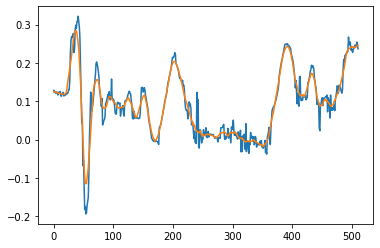

In [152]:
# ----------------------
# Lets run it
# ----------------------

columns = computeUsedColumns()
data = createDataset(columns, moveDetectionDuration = 333333)

In [153]:
#Create training and validation sets
xTrain, yTrain, xVal, yVal=createSets(data, 0.7, 132)

Creating training set with 92 files
1. Processing s01/part1_layout_p02/20151105_191251_00..
2. Processing s01/part1_layout_p02/20151105_192144_00..
3. Processing s01/part1_layout_p02/20151105_192312_00..
4. Processing s01/part1_layout_p02/20151105_192407_00..
5. Processing s01/part1_layout_p02/20151105_192610_00..
6. Processing s01/part1_layout_p02/20151105_192717_00..
7. Processing s01/part1_layout_p02/20151105_193157_00..
8. Processing s01/part2_layout_p01/20151105_194301_00..
9. Processing s01/part2_layout_p01/20151105_194456_00..
10. Processing s01/part2_layout_p01/20151105_194650_00..
11. Processing s01/part2_layout_p01/20151105_194955_00..
12. Processing s01/part2_layout_p01/20151105_195111_00..
13. Processing s01/part2_layout_p01/20151105_195450_00..
14. Processing s02/part1_layout_p04/20151106_214357_00..
15. Processing s02/part1_layout_p04/20151106_214521_00..
16. Processing s02/part1_layout_p04/20151106_214647_00..
17. Processing s02/part1_layout_p04/20151106_215028_00..
18. 

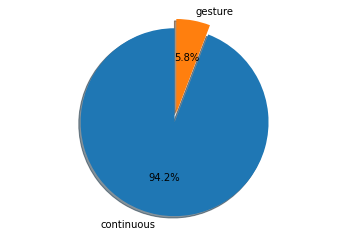

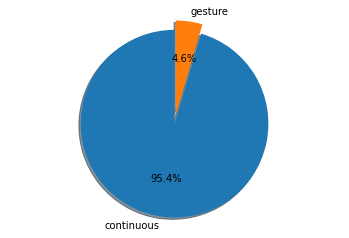

In [154]:
del data, columns
plotRatio(yTrain)
plotRatio(yVal)

In [240]:
# Loading of a random skeleton after columns computation
columns = computeUsedColumns()
skeleton = loadEggnogSkeleton("s09/part1_layout_p18/20151202_220007_00_Skeleton.txt", columns)

,Index,Time,SpineBaseLocX,SpineBaseLocY,SpineBaseLocZ,SpineBaseOrW,SpineBaseOrX,SpineBaseOrY,SpineBaseOrZ,SpineMidLocX,...,HandTipLeftLocZ,ThumbLeftLocX,ThumbLeftLocY,ThumbLeftLocZ,HandTipRightLocX,HandTipRightLocY,HandTipRightLocZ,ThumbRightLocX,ThumbRightLocY,ThumbRightLocZ
0,0,60878,0.053447,-0.162291,1.434072,-0.022577,-0.023818,0.998039,-0.053311,0.040736,...,1.014916,-0.069032,-0.154633,1.041190,0.240742,-0.306784,1.351699,0.218990,-0.299937,1.359273
1,1,390144,0.054116,-0.162295,1.433774,-0.017966,-0.023970,0.998193,-0.052089,0.041452,...,0.981035,-0.060905,-0.172562,1.021500,0.239906,-0.310283,1.350658,0.219084,-0.298437,1.360628
2,2,1060801,0.053934,-0.162334,1.433705,-0.010826,-0.023720,0.998357,-0.051018,0.041578,...,0.912276,-0.072966,-0.132589,0.928683,0.237392,-0.309386,1.346722,0.205838,-0.236437,1.377250
3,3,1390146,0.053893,-0.162351,1.433710,-0.004227,-0.025078,0.998382,-0.050858,0.041006,...,0.890690,-0.077538,-0.106902,0.913516,0.237712,-0.309051,1.344883,0.208902,-0.240640,1.380791
4,4,1720109,0.053911,-0.162392,1.433695,0.003329,-0.026128,0.998366,-0.050714,0.040675,...,0.876535,-0.077298,-0.089506,0.898283,0.238099,-0.305895,1.346989,0.216132,-0.241034,1.384105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,392,148060801,0.045580,-0.108119,1.455182,0.145699,-0.032601,0.985284,-0.083215,0.035697,...,1.296449,-0.092559,-0.254029,1.321857,0.202861,-0.333698,1.366811,0.174368,-0.281252,1.357269
393,393,148390054,0.047760,-0.108602,1.454057,0.146402,-0.034822,0.985216,-0.081875,0.036714,...,1.283477,-0.082355,-0.247904,1.308333,0.205852,-0.339056,1.357043,0.179815,-0.286844,1.355428
394,394,148720241,0.053461,-0.110056,1.451808,0.143861,-0.042106,0.985681,-0.077232,0.038356,...,1.269629,-0.071396,-0.229236,1.298470,0.223491,-0.294592,1.335249,0.207811,-0.229285,1.397500
395,395,149060797,0.058322,-0.110357,1.450089,0.140336,-0.047608,0.986408,-0.070976,0.039977,...,1.257237,-0.061778,-0.245469,1.286250,0.226005,-0.293617,1.331070,0.215692,-0.243804,1.380643


In [155]:
xTrain, yTrain=removeSamples(xTrain, yTrain, 50000)

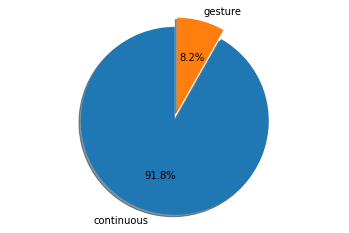

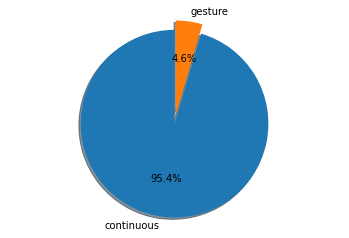

In [156]:
plotRatio(yTrain)
plotRatio(yVal)

In [157]:
xTrain, yTrain=equalizeSamples(xTrain, yTrain, 0.5)
#xVal, yVal=equalizeSamples(xVal, yVal, 0.5)

counting true labels
Found 10113 TRUE samples out of 123475 total samples
Equalizing samples
Samples equalized with 0.5 ratio


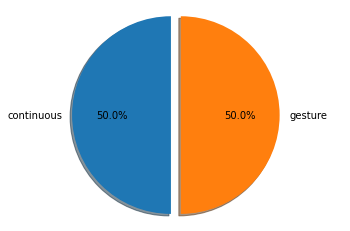

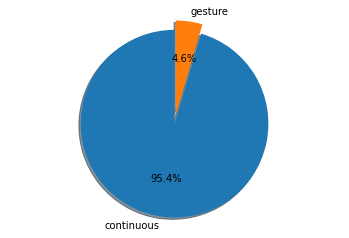

In [158]:
plotRatio(yTrain)
plotRatio(yVal)

In [197]:
shape=(len(xTrain[0]), len(xTrain[0][0]))
#model=createLSTM(100, 1, shape)
model=createModel(cell_type="LSTM", n_layers=2, n_hidden=160, n_fc1=160, n_frames=len(xTrain[0]), skel_dim=len(xTrain[0][0]))

In [ ]:
yTrainBinary=tf.keras.utils.to_categorical(yTrain)
yValBinary=tf.keras.utils.to_categorical(yVal)

history=trainLSTM(model, 40, 64, xTrain, yTrainBinary, xVal, yValBinary)

Train on 226724 samples, validate on 56181 samples
Epoch 1/40
226724/226724 [==============================] - 205s 906us/sample - loss: 0.6871 - val_loss: 0.6456
Epoch 2/40
226724/226724 [==============================] - 204s 898us/sample - loss: 0.6807 - val_loss: 0.5868
Epoch 3/40
166176/226724 [====================>.........] - ETA: 51s - loss: 0.3373

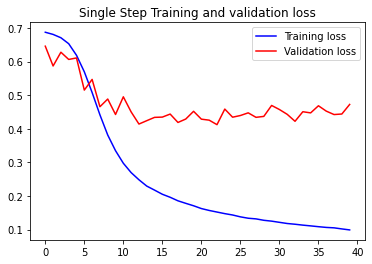

In [199]:
plot_train_history(history, 'Single Step Training and validation loss')

In [184]:
#model.save("/home/lepluard/denver/workspace/data")
#modelV2=tf.keras.models.load_model("/home/lepluard/denver/workspace/data")

In [200]:
count=0
for i in range (len(yVal)):
    if (yVal[i]==1):
        count+=1
        
print(count)

2565


In [201]:
a=np.array(xVal)

In [202]:
b=np.array(yVal)

In [203]:
predictedValues=model.predict(a)

In [204]:
predictedValues[0]

array([9.999722e-01, 2.774924e-05], dtype=float32)

In [205]:
plotRange=1000

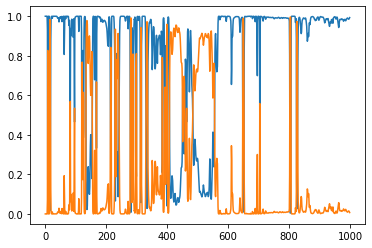

In [206]:
plt.plot(predictedValues[:plotRange])

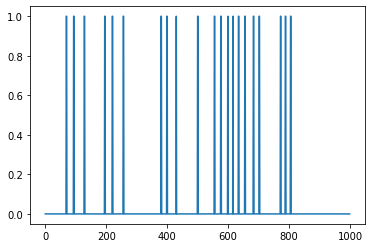

In [207]:
plt.plot(b[:plotRange])

In [208]:
y_pred=model.predict_classes(a)

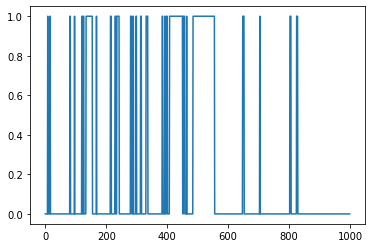

In [209]:
plt.plot(y_pred[:1000])


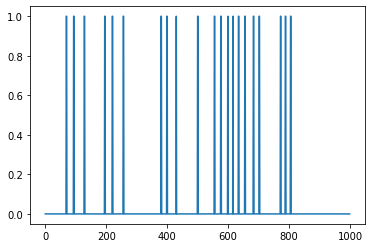

In [210]:
plt.plot(yVal[:1000])


In [211]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 20, 160)           166400    
_________________________________________________________________
lstm_11 (LSTM)               (None, 160)               205440    
_________________________________________________________________
dense_10 (Dense)             (None, 160)               25760     
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 322       
_________________________________________________________________
softmax_5 (Softmax)          (None, 2)                 0         
Total params: 397,922
Trainable params: 397,922
Non-trainable params: 0
_________________________________________________________________


In [212]:
TP=0
TN=0
FP=0
FN=0

In [213]:

for i in range(len(y_pred)):
    if (b[i]==1 and y_pred[i]==1):
        TP+=1
    elif (b[i]==0 and y_pred[i]==0):
        TN+=1
    elif (b[i]==0 and y_pred[i]==1):
        FP+=1
    elif (b[i]==1 and y_pred[i]==0):
        FN+=1

In [214]:
confusionMatrix=[[TP, FP], [FN, TN]]

In [215]:
confusionMatrix

[[197, 3842], [2368, 49774]]

In [216]:
print([TP, FP])
print([FN, TN])

[197, 3842]
[2368, 49774]


In [217]:
(TP+TN)/(TP+FP+FN+TN)

0.889464409675869

In [218]:
TP/(TP+FN)

0.07680311890838207

In [171]:
#dic = {"a1":"valuea1", "b2": "valueb2", "c3": "valuec3"}
#a = list(dic.keys())
#a[0]